In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns; sns.set(style='white')
%matplotlib inline

In [2]:
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost\SQLEXPRESS01;'
                      'Database=GameDataDb;'
                      'Trusted_Connection=yes;')

# Users

In [3]:
select_users_query = "SELECT [Id] ,[Date] ,[Country] ,[Gender] ,[Age] FROM [GameDataDb].[dbo].[Users]"
users = pd.read_sql_query(select_users_query, conn)
users.head()

,Id,Date,Country,Gender,Age
0,3B48BC3C-ABD1-4B87-B0C0-00001928BAA5,2018-01-07 00:00:00.0000000,Brazil,male,17
1,8B7B7BB6-8827-4784-BB0D-00003A11FD67,2018-01-19 00:00:00.0000000,Japan,female,45
2,20569147-5579-471B-B63F-00003F02E78B,2018-01-24 00:00:00.0000000,Chile,female,57
3,533FC85D-E88F-4E8D-9D05-00004D827E4E,2018-01-03 00:00:00.0000000,Guinea,female,25
4,01766165-B9A3-4D7C-B546-00005831CED3,2018-01-02 00:00:00.0000000,United States of America,female,50


## Gender

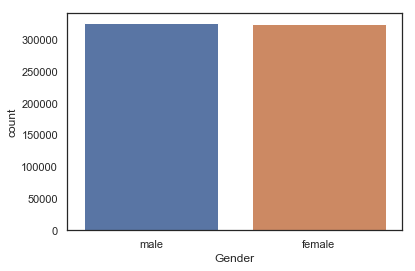

In [4]:
sns.countplot(x='Gender', data=users)

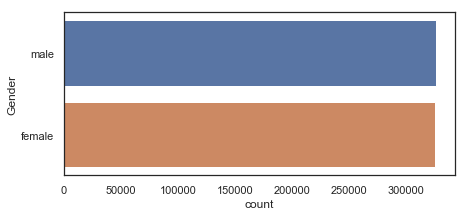

In [5]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='Gender', data=users, orient='v');

In [6]:
genders = users.Gender.value_counts()
total_users = users.Gender.count()
genders

male      326061
female    325023
Name: Gender, dtype: int64

In [7]:
genders.apply(lambda x: x / total_users).values

array([0.50079713, 0.49920287])

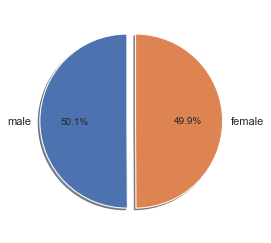

In [8]:
labels = ['male', 'female']

sizes = genders.apply(lambda x: x / total_users).values

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);

## Age

### We can see that data is generated artificially - Age distribution is uniform

Gender
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

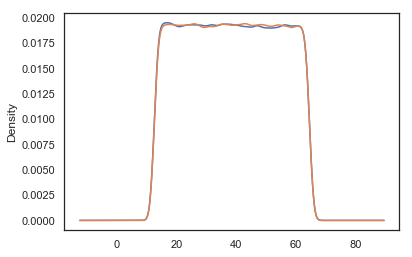

In [25]:
users.groupby('Gender').Age.plot(kind='kde')

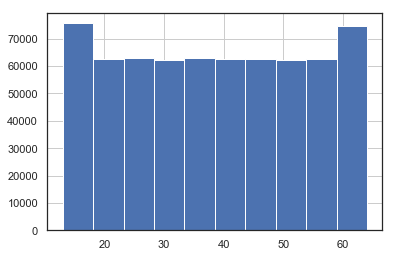

In [26]:
users.Age.hist()

## Country

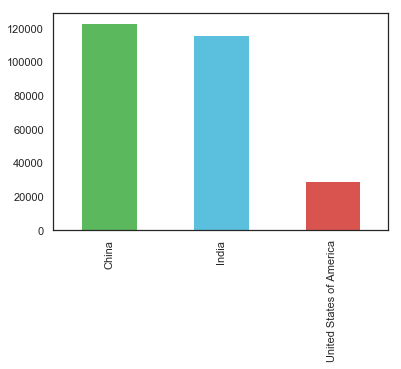

In [9]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
users.Country.value_counts()[:3].plot(kind='bar', color = colors_list,edgecolor=None)

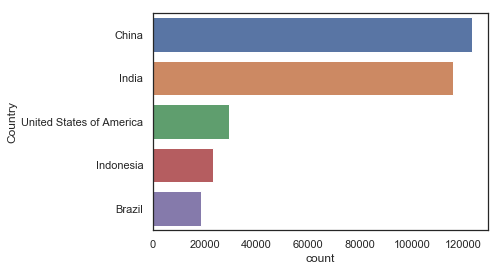

In [10]:
sns.countplot(y='Country', data=users,  order=users.Country.value_counts().iloc[:5].index)

In [11]:
country_distr = users.Country.value_counts()
country_distr.index

Index(['China', 'India', 'United States of America', 'Indonesia', 'Brazil',
       'Pakistan', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan',
       ...
       'Latvia', 'Estonia', 'Republic of Kosovo', 'Lesotho', 'Mauritius',
       'Trinidad and Tobago', 'Equatorial Guinea', 'Timor-Leste',
       'Guinea-Bissau', 'Swaziland'],
      dtype='object', length=159)

In [12]:
others_count = country_distr[~country_distr.index.isin(['China', 'India', 'United States of America', 'Indonesia', 'Brazil'])].sum()

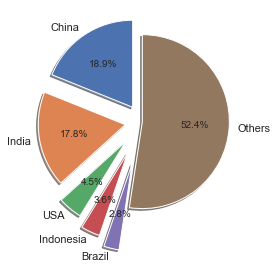

In [13]:
labels = ['China', 'India', 'USA','Indonesia', 'Brazil', 'Others']

sizes = [country_distr['China'], country_distr['India'], country_distr['United States of America'],country_distr['Indonesia'], country_distr['Brazil'], others_count]


# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2, 0.2, 0.3,0.4, 0.5 ,0.)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);

!conda install -c conda-forge folium

In [17]:
import folium

In [21]:
country_distr.values

array([123113, 115923,  29255,  23159,  18447,  17516,  16714,  14515,
        13068,  11317,  10808,   9206,   8227,   8218,   8145,   7703,
         7299,   7049,   7009,   5934,   5884,   5874,   5483,   5106,
         5003,   4455,   4450,   4358,   4210,   4203,   3870,   3748,
         3610,   3520,   3438,   3397,   3110,   3059,   2957,   2922,
         2900,   2872,   2815,   2800,   2482,   2476,   2407,   2406,
         2405,   2228,   2197,   2173,   2057,   1993,   1982,   1929,
         1872,   1802,   1737,   1719,   1665,   1658,   1602,   1555,
         1537,   1475,   1425,   1400,   1391,   1320,   1318,   1259,
         1175,   1074,   1061,   1042,   1012,   1005,    975,    970,
          927,    921,    906,    901,    896,    894,    865,    856,
          838,    828,    799,    789,    754,    749,    748,    706,
          700,    683,    679,    672,    661,    636,    634,    627,
          617,    557,    556,    555,    540,    529,    493,    473,
      

In [22]:
countries_df = pd.DataFrame({'Country': country_distr.index, 'Total': country_distr.values})

In [45]:
world_geo = r'world-countries.json'
 
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(country_distr.min(),
                              country_distr.max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration
 
# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=countries_df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Users. Black - no info',
    reset=True
)
world_map


C:\Users\kilianovski\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Last day revenue

1. Tier 0: zero revenue
1. Tier 1: 0.1 - 14.9 dollars
1. Tier 2: 15 - 30 dollars
1. Tier 3: 30 - 50 dollars


In [27]:
last_day_revenue_query= """  select 
	u.Id UserId,
	SUM(cb.Price) TotalUSDIncome
  from [GameDataDb].[dbo].[Users] u
  left join [GameDataDb].[dbo].[CurrencyBuy] cb ON cb.UserId = u.Id AND cb.Date = '2018-01-30'
  group by u.Id
  order by TotalUSDIncome desc"""

last_day_revenue = pd.read_sql_query(last_day_revenue_query, conn)
last_day_revenue.head()

,UserId,TotalUSDIncome
0,F4CDF7AE-77A7-4EC3-8931-0028DC02A6EA,50.0
1,49E42CEF-2EEC-4A8C-884A-0080922EB9A6,50.0
2,4BB11208-A7A1-49BA-B812-00A5CDCF5A95,50.0
3,AB92100A-E91B-4360-984B-00C88D55736F,50.0
4,BB9DBE81-4417-4E47-9CE5-00566CFDE8E2,50.0


In [51]:
last_day_revenue.TotalUSDIncome.fillna(0, inplace=True)

In [68]:
last_day_revenue_tiers_df = pd.DataFrame({
    'Tier': ['Tier 0','Tier 1','Tier 2','Tier 3'],
    'Count': [
        last_day_revenue[last_day_revenue.TotalUSDIncome == 0].UserId.count(),
    last_day_revenue[(last_day_revenue.TotalUSDIncome > 0) & (last_day_revenue.TotalUSDIncome < 14.9)].UserId.count(),
    last_day_revenue[(last_day_revenue.TotalUSDIncome >= 14.9) & (last_day_revenue.TotalUSDIncome < 30)].UserId.count(),
    last_day_revenue[(last_day_revenue.TotalUSDIncome >= 30)].UserId.count(),
    ]
})

last_day_revenue_tiers_df

,Tier,Count
0,Tier 0,642378
1,Tier 1,5272
2,Tier 2,1693
3,Tier 3,1741


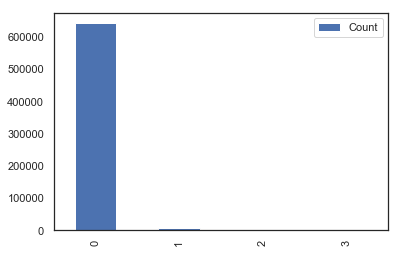

In [72]:
last_day_revenue_tiers_df.plot(kind='bar')

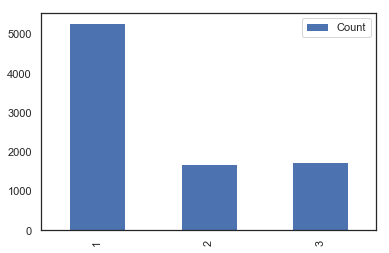

In [73]:
last_day_revenue_tiers_df[last_day_revenue_tiers_df.Tier != 'Tier 0'].plot(kind='bar')

## Cheaters

In [76]:
cheaters_query = """select 
	u.Id UserId,
	IIF(SUM(ib.Price) > SUM(cb.Income), 1, 0) IsCheater
from Users u
inner join CurrencyBuy cb on cb.UserId = u.Id
inner join ItemBuy ib on ib.UserId = u.Id
group by u.Id"""
cheaters = pd.read_sql_query(cheaters_query, conn)
cheaters.head()

,UserId,IsCheater
0,0BE924E3-0433-4421-A385-00023F17D14D,0
1,CEADE4F3-43BA-426E-A482-00050373606B,0
2,1937C5D2-0B57-4A28-BD1A-0005A785AD2A,0
3,5F1AFEFC-3455-4855-A9A8-00067BAE0033,0
4,66BADD6E-64C4-440B-8539-000B212B42E6,1


In [78]:
cheater_count = cheaters.IsCheater.value_counts()
cheater_count

0    29402
1    17010
Name: IsCheater, dtype: int64

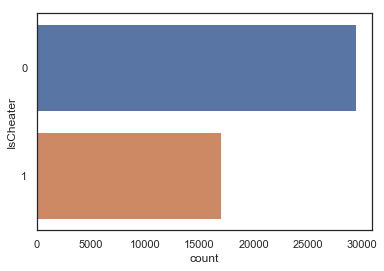

In [81]:
sns.countplot(y='IsCheater', data=cheaters)

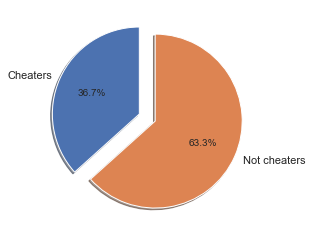

In [80]:
labels = ['Cheaters', 'Not cheaters']

sizes = [cheater_count[1], cheater_count[0]]


# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);

# Revenue by items for a given day

In [121]:
select_itembuy_query = "SELECT[Id] ,[Date] ,[UserId] ,[Item] ,[Price] FROM [GameDataDb].[dbo].[ItemBuy]"
item_buy = pd.read_sql_query(select_itembuy_query, conn)
item_buy.head()

,Id,Date,UserId,Item,Price
0,5DC4556F-FC68-459E-81B2-00001282DB50,2018-01-25 00:00:00.0000000,B6E225B9-9B70-4463-90C0-20BBEA7319DD,Sacrificial Altar,600.0
1,E6A3ADF3-D2A7-4D13-93D5-00001B9661B9,2018-01-23 00:00:00.0000000,8A5369AA-DD76-4D5D-A4C4-EF9E8746FAAF,Plan C,550.0
2,58CF16F5-10B1-4693-9A88-00001F4BB049,2018-01-18 00:00:00.0000000,49522DFF-9706-42A1-B07F-D024D5D47B84,Monstros Tooth,10.0
3,C1C849A1-9A50-48F2-8FD2-00002BFBB43A,2018-01-29 00:00:00.0000000,50A53746-3954-4A15-9E81-8CFD01C927E5,Remote Detonator,170.0
4,F886D293-E7CB-4F0C-A179-0000448BE558,2018-01-23 00:00:00.0000000,F3935C38-18A8-4938-B023-B887254E830C,The Nail,540.0


In [163]:
def get_items_buy_by_date(date):
    item_revenue = item_buy[item_buy.Date == date].groupby('Item').Price.sum().sort_values(ascending=False)[:20]
    item_revenue.plot.bar()
    
    labels = list(item_revenue[:3].index.values) + ['Other']

    sizes = list(item_revenue[:3].values) + [item_revenue[~item_revenue.isin(item_revenue[:3].index.values)].sum()]


    # only "explode" the 2nd slice (i.e. 'Hogs')
    explode = (0.3, 0.0, 0.1, 0.3)  
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90);

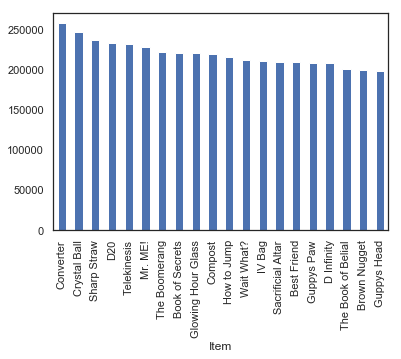

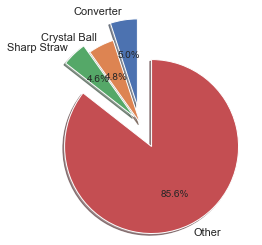

In [162]:
get_items_buy_by_date(item_buy.Date[0])

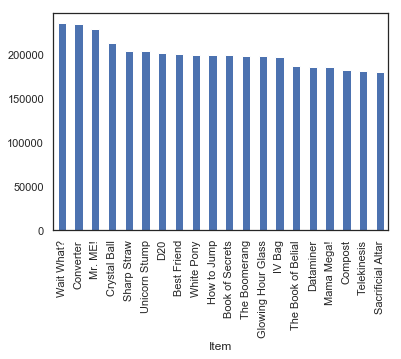

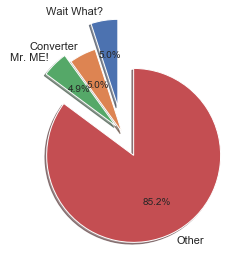

In [164]:
get_items_buy_by_date(item_buy.Date[1])

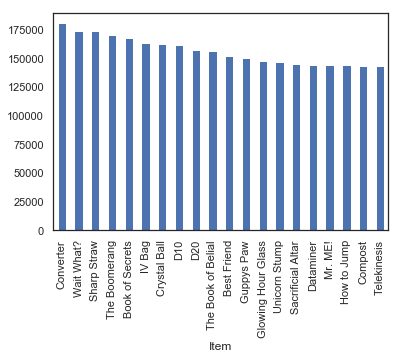

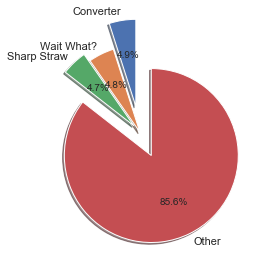

In [165]:
get_items_buy_by_date(item_buy.Date[2])

In [156]:
[item_revenue[~item_revenue.isin(item_revenue[:3].index.values)].sum()]

[5155010.0]

# Currency rate

In [178]:
currencty_rate_query = """SELECT
  cb.Date,
  SUM(cb.Price) / SUM(cb.Income) CurrencyRate
FROM CurrencyBuy cb
GROUP BY cb.Date
ORDER BY cb.Date"""

currencty_rate = pd.read_sql_query(currencty_rate_query, conn)
currencty_rate.head()

,Date,CurrencyRate
0,2018-01-01 00:00:00.0000000,0.086698
1,2018-01-02 00:00:00.0000000,0.086893
2,2018-01-03 00:00:00.0000000,0.086211
3,2018-01-04 00:00:00.0000000,0.086690
4,2018-01-05 00:00:00.0000000,0.086622


In [180]:
currencty_rate.CurrencyRate

0     0.086698
1     0.086893
2     0.086211
3     0.086690
4     0.086622
5     0.086565
6     0.086715
7     0.086782
8     0.086740
9     0.086545
10    0.086777
11    0.086558
12    0.086754
13    0.086710
14    0.086623
15    0.086777
16    0.086743
17    0.086593
18    0.086721
19    0.086610
20    0.086642
21    0.086652
22    0.086568
23    0.086721
24    0.086715
25    0.086613
26    0.086726
27    0.086689
28    0.086646
29    0.086645
Name: CurrencyRate, dtype: float64

In [195]:
ts = pd.Series(data=currencty_rate.CurrencyRate)
ts.index = currencty_rate.Date.map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f0'))
ts

Date
2018-01-01    0.086698
2018-01-02    0.086893
2018-01-03    0.086211
2018-01-04    0.086690
2018-01-05    0.086622
2018-01-06    0.086565
2018-01-07    0.086715
2018-01-08    0.086782
2018-01-09    0.086740
2018-01-10    0.086545
2018-01-11    0.086777
2018-01-12    0.086558
2018-01-13    0.086754
2018-01-14    0.086710
2018-01-15    0.086623
2018-01-16    0.086777
2018-01-17    0.086743
2018-01-18    0.086593
2018-01-19    0.086721
2018-01-20    0.086610
2018-01-21    0.086642
2018-01-22    0.086652
2018-01-23    0.086568
2018-01-24    0.086721
2018-01-25    0.086715
2018-01-26    0.086613
2018-01-27    0.086726
2018-01-28    0.086689
2018-01-29    0.086646
2018-01-30    0.086645
Name: CurrencyRate, dtype: float64

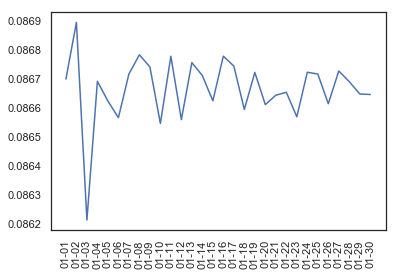

In [199]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(ts.index, ts.values)
ax.set_xticks(ts.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m-%d"))
_=plt.xticks(rotation=90)   

# Level complexity

In [214]:
level_stat_query = """SELECT
  ss.Stage,
  COUNT(ss.Id) StageStarted,
  COUNT(se.Id) StageEnded,
  SUM(CAST(se.Win AS BIGINT)) Wins
FROM StageStart ss
  INNER JOIN StageEnd se ON se.UserId = ss.UserId
GROUP BY ss.Stage
ORDER BY ss.Stage"""

level_stat = pd.read_sql_query(level_stat_query, conn)
level_stat.head()

,Stage,StageStarted,StageEnded,Wins
0,1,18930744,18930744,8533459
1,2,19647796,19647796,8960831
2,3,8523428,8523428,4219091
3,4,13898986,13898986,6636553
4,5,20529450,20529450,9445991


In [207]:
level_stat['Complexity'] = level_stat.Wins / level_stat.StageStarted

In [208]:
level_stat.head()

,Stage,StageStarted,StageEnded,Wins,Complexity
0,1,18930744,18930744,8533459,0.450773
1,2,19647796,19647796,8960831,0.456073
2,3,8523428,8523428,4219091,0.494999
3,4,13898986,13898986,6636553,0.477485
4,5,20529450,20529450,9445991,0.460119


In [210]:
level_complexity = pd.Series(level_stat.Complexity)
level_complexity.index = level_stat.Stage
level_complexity.head()

Stage
1    0.450773
2    0.456073
3    0.494999
4    0.477485
5    0.460119
dtype: float64

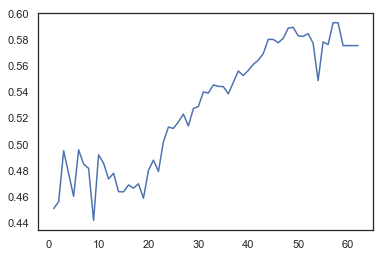

In [213]:
plt.plot(level_stat.Stage, level_stat.Complexity)